In [33]:
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
from flickplay.mongo import get_mongo_db_obj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

conp = get_pymysql_con()

In [5]:
query = """
SELECT
    date, count(distinct(wallet_address)) wallets_added
FROM
--    fpa.events
    (
        SELECT * FROM fpa.events where event='profile_wallet__connect_suc'
    ) x
GROUP BY
    date
-- HAVING
--    event='profile_wallet__connect_suc'
"""

df = pd.read_sql(query, conp)

In [8]:
month = []
for idx, row in df.iterrows():
    mo = str(row.date).split('-')[1]
    month.append(mo)
    
df['month'] = month



In [21]:
df[['wallets_added','month']].groupby('month').sum().wallets_added

month
04     22
05     74
06    155
07    351
08    147
09    175
10     93
11     38
12     43
Name: wallets_added, dtype: int64

In [22]:
query = """
SELECT
    event, date, $user_id, wallet_address
FROM
    fpa.events
WHERE
    event like 'profile_wallet__%connect_suc';
"""

df = pd.read_sql(query, conp)

df

,event,date,$user_id,wallet_address
0,profile_wallet__connect_suc,2022-04-21,609d510c4244340b2a77c83a,0x27ca75df20f66cdf640bad45e9d9c0cd5b603bc4
1,profile_wallet__disconnect_suc,2022-04-21,609d510c4244340b2a77c83a,0x27ca75df20f66cdf640bad45e9d9c0cd5b603bc4
2,profile_wallet__connect_suc,2022-04-21,609d510c4244340b2a77c83a,0x27ca75df20f66cdf640bad45e9d9c0cd5b603bc4
3,profile_wallet__connect_suc,2022-04-21,609d510c4244340b2a77c83a,0xD08CF25903D0491bFBef032D448b91B65E5C10C0
4,profile_wallet__disconnect_suc,2022-04-21,609d510c4244340b2a77c83a,0xd08cf25903d0491bfbef032d448b91b65e5c10c0
...,...,...,...,...
2604,profile_wallet__disconnect_suc,2022-12-20,63688713604f359ad6570562,0xff5b9329d349d4e89cc69842c7779d31cf872acd
2605,profile_wallet__connect_suc,2022-12-20,63688713604f359ad6570562,0x0a37601a0db224304b1b55b092145166e05a7928
2606,profile_wallet__disconnect_suc,2022-12-20,63688713604f359ad6570562,0x0a37601a0db224304b1b55b092145166e05a7928
2607,profile_wallet__connect_suc,2022-12-20,63688713604f359ad6570562,0x2448459f46c2Ed5A0A97a96c3f9B3c8533B5D2d4


In [38]:
wallets, wallets_summing_only = set(), set()

size_wallets, size_wallets_summing_only = [], []
dates = []

prev_date = df.iloc[0].date
for idx, row in df.iterrows():
    if row.date != prev_date:
        dates.append(prev_date)
        size_wallets.append(len(wallets))
        size_wallets_summing_only.append(len(wallets_summing_only))
        prev_date = row.date
    if row.event == 'profile_wallet__disconnect_suc':
        try:
            wallets.remove(wallet_address)
        except:
            pass
    else:
        wallets.add(row.wallet_address)
        wallets_summing_only.add(row.wallet_address)
        

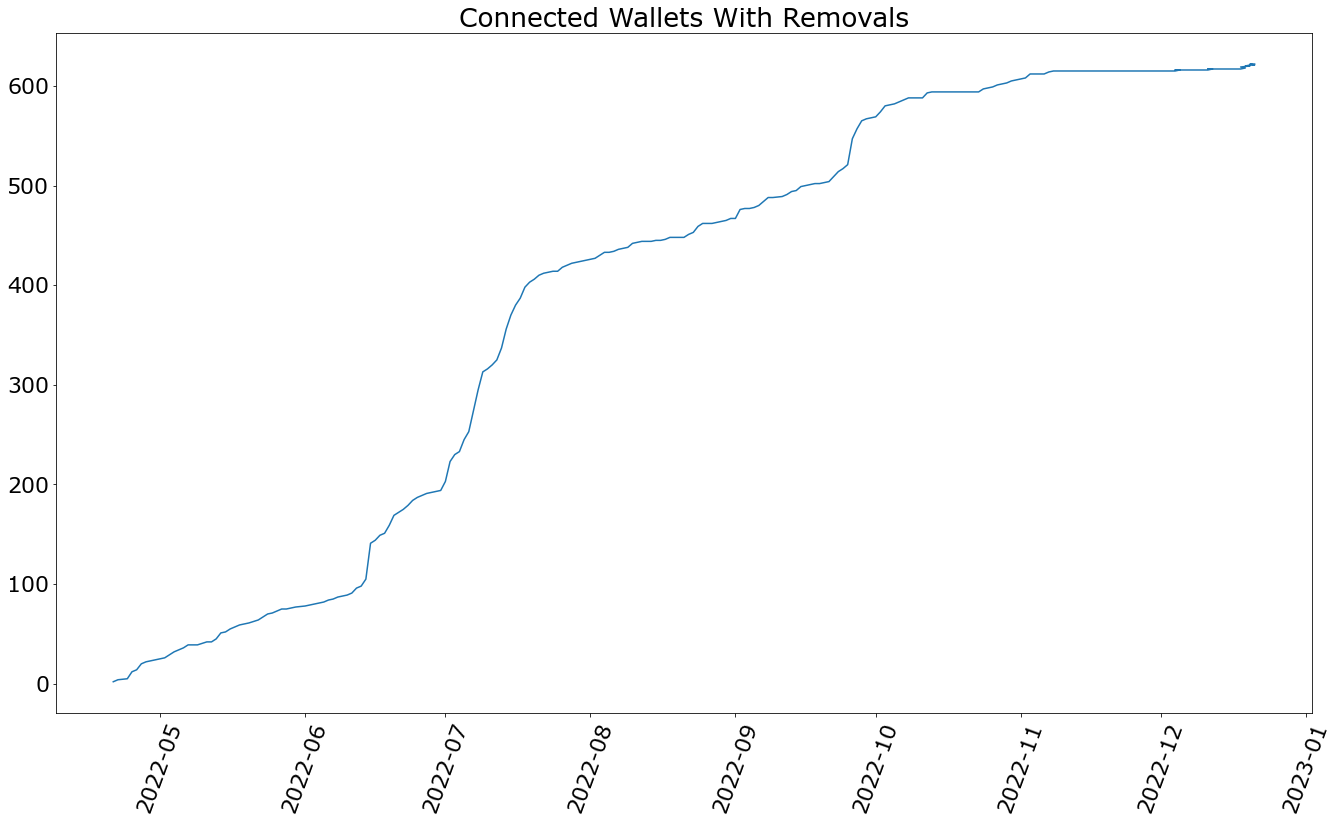

In [39]:



font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(22.5, 12.5)
plt.plot(dates, size_wallets)
plt.xticks(rotation=70)
plt.title('Connected Wallets With Removals')

plt.show()

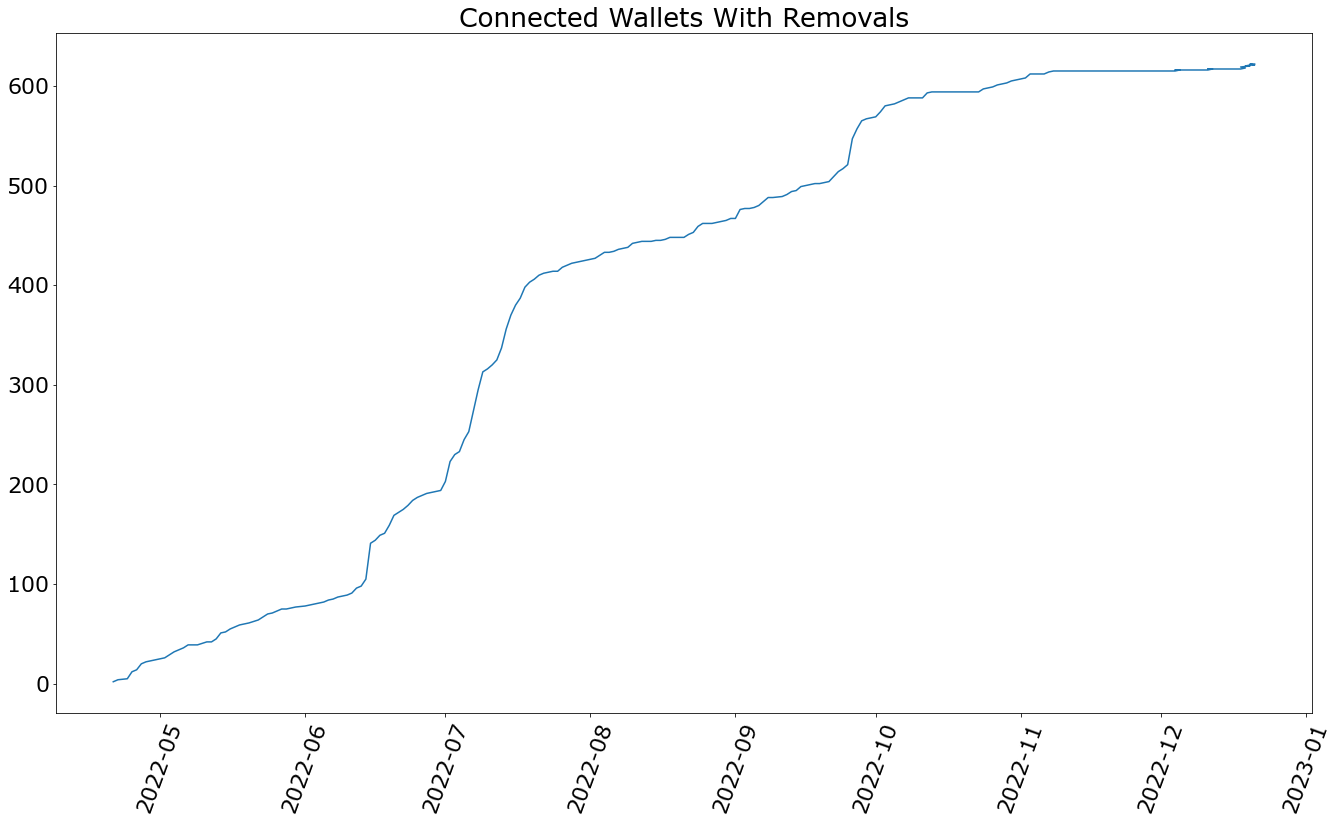

In [40]:


font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(22.5, 12.5)
plt.plot(dates, size_wallets_summing_only)
plt.xticks(rotation=70)
plt.title('Connected Wallets With Removals')

plt.show()

In [41]:
np.array(size_wallets) == np.array(size_wallets_summing_only)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [42]:
query = """
SELECT count(distinct(wallet_address))

FROM fpa.events

WHERE

event='profile_wallet__connect_suc'
"""

pd.read_sql(query, conp)

,count(distinct(wallet_address))
0,616


In [45]:
query = """
SELECT count(distinct($user_id)) as MAU, month
from fpa.derived
group by month
"""

df = pd.read_sql(query, conp)

In [46]:
df

,MAU,month
0,2715,02
1,4858,03
2,3041,04
3,2619,05
4,4113,06
5,2912,07
6,1669,08
7,1767,09
8,1693,10
9,1736,11


In [79]:
query = """
select min(date) first, max(date) last, max(date) - min(date) duration, count(distinct(date)) N_days, $user_id
from ( select date, $user_id from fpa.events where anon_user=0 ) x
group by $user_id
having first >= '2022-08-01' and first <= '2022-08-31' 
order by last DESC;
"""

df = pd.read_sql(query, conp)
df['quit_month'] = [ str(_).split('-')[1] for _ in  df['last'] ]

print('month,', 'n_users_leaving')

for qm in sorted(list(set(df.quit_month))):
    print(qm, len(df[df.quit_month == qm]))

month, n_users_leaving
08 135
09 18
10 14
11 9
12 12


In [80]:
len(df)

188

Above is a table of the 1236 users who joined in March 2022, who are not anonymous.

The following is the number of users who joined in March 2022 (excluding anonymous), who left in the month shown:

Of users who joined in march (1236) most of them (748) left in March.  Then 158 left in April, 90 in may, etc.

Note that quit month of 12 is invalid since data only up to 12-21.

In [81]:
print('month,', 'n_users_leaving')

for qm in sorted(list(set(df.quit_month))):
    print(qm, len(df[df.quit_month == qm]))

month, n_users_leaving
08 135
09 18
10 14
11 9
12 12


In [77]:
[ str(_).split('-')[1] for _ in  df['last'] ]

['12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',

## todo - add anon_user flag, wallet_address to derived table